In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#한글폰트 설정
plt.rc("font", family="Malgun Gothic")
# -값 깨지는 것 보정
plt.rc("axes", unicode_minus=False)

In [54]:
df1 = pd.read_csv("2_지역단위직업군.csv")

In [73]:
df2 = pd.read_csv("6_지역단위신용점수.csv")

In [56]:
df3 = pd.read_csv("7_지역단위자동차보유.csv")

In [57]:
df1.head()

,BS_YR_MON,GB,CT_PRVNC_CD,CT_PRVNC_NM,CT_CNTY_GU_CD,CT_CNTY_GU_NM,ADM_DONG_CD,ADM_DONG_NM,GENDER,AGE_CD,RT_MDL_GB_410,RT_MDL_GB_420,RT_MDL_GB_430,RT_MDL_GB_440,RT_MDL_GB_510,RT_MDL_GB_520,RT_MDL_GB_910
0,202001,ADM_DONG,27,대구광역시,27170,서구,27170565,비산2.3동,2,50,0.00,0.39,0.0,0.00,0.16,0.0,0.45
1,202001,ADM_DONG,27,대구광역시,27170,서구,27170565,비산2.3동,2,60,0.00,0.27,0.0,0.00,0.11,0.0,0.61
2,202001,ADM_DONG,43,충청북도,43760,괴산군,43760390,사리면,2,50,0.01,0.33,0.0,0.00,0.23,0.0,0.43
3,202001,ADM_DONG,43,충청북도,43760,괴산군,43760390,사리면,2,70,0.00,0.04,0.0,0.01,0.58,0.0,0.38
4,202001,ADM_DONG,43,충청북도,43760,괴산군,43760390,사리면,2,30,0.00,0.47,0.0,0.00,0.07,0.0,0.46


In [74]:
df2.head()

,BS_YR_MON,GB,CT_PRVNC_CD,CT_PRVNC_NM,CT_CNTY_GU_CD,CT_CNTY_GU_NM,ADM_DONG_CD,ADM_DONG_NM,GENDER,AGE_CD,AVG_SCR,RT_SCR1,RT_SCR2,RT_SCR3
0,202001,ADM_DONG,43,충청북도,43770,음성군,43770360,생극면,2,60,4,0.54,0.38,0.08
1,202001,ADM_DONG,43,충청북도,43770,음성군,43770360,생극면,2,30,4,0.22,0.70,0.07
2,202001,ADM_DONG,43,충청북도,43770,음성군,43770360,생극면,2,40,5,0.35,0.48,0.17
3,202001,ADM_DONG,43,충청북도,43770,음성군,43770360,생극면,2,20,4,0.24,0.73,0.03
4,202001,ADM_DONG,43,충청북도,43770,음성군,43770360,생극면,2,70,4,0.55,0.39,0.06


In [59]:
df3.head()

,BS_YR_MON,GB,CT_PRVNC_CD,CT_PRVNC_NM,CT_CNTY_GU_CD,CT_CNTY_GU_NM,ADM_DONG_CD,ADM_DONG_NM,GENDER,AGE_CD,...,CAR_SZ02_CNT,CAR_SZ03_CNT,CAR_SZ04_CNT,CAR_SZ05_CNT,CAR_DMST_CNT,CAR_FRGN_CNT,CAR_NEW_CNT,CAR_USED_CNT,AVG_CAR_AMT,RT_LSE_OWN
0,202001,ADM_DONG,28,인천광역시,28110,중구,28110540,신흥동,2,60,...,3,19,16,17,61,6,44,22,1902.0,0.0
1,202001,ADM_DONG,28,인천광역시,28110,중구,28110540,신흥동,2,70,...,0,4,5,7,15,2,14,3,1972.0,0.0
2,202001,ADM_DONG,28,인천광역시,28245,계양구,28245640,작전서운동,1,20,...,3,24,29,19,79,7,29,54,2268.0,0.0
3,202001,ADM_DONG,28,인천광역시,28245,계양구,28245640,작전서운동,1,40,...,6,63,173,242,503,46,339,189,2409.0,0.0
4,202001,ADM_DONG,28,인천광역시,28245,계양구,28245640,작전서운동,1,30,...,5,98,128,108,350,39,235,135,2228.0,0.0


# 직업군별 비율 (2)번 파일 수정 시작

### 안쓰는 컬럼 제거

In [60]:
cols1 = df1.columns
cols1

Index(['BS_YR_MON', 'GB', 'CT_PRVNC_CD', 'CT_PRVNC_NM', 'CT_CNTY_GU_CD',
       'CT_CNTY_GU_NM', 'ADM_DONG_CD', 'ADM_DONG_NM', 'GENDER', 'AGE_CD',
       'RT_MDL_GB_410', 'RT_MDL_GB_420', 'RT_MDL_GB_430', 'RT_MDL_GB_440',
       'RT_MDL_GB_510', 'RT_MDL_GB_520', 'RT_MDL_GB_910'],
      dtype='object')

In [61]:
cols_cd = cols1[cols1.str.contains("PRVNC_CD|_GU_CD")]
cols_cd

Index(['CT_PRVNC_CD', 'CT_CNTY_GU_CD'], dtype='object')

In [62]:
df1 = df1.drop(cols_cd, axis=1)
df1.head(3)

,BS_YR_MON,GB,CT_PRVNC_NM,CT_CNTY_GU_NM,ADM_DONG_CD,ADM_DONG_NM,GENDER,AGE_CD,RT_MDL_GB_410,RT_MDL_GB_420,RT_MDL_GB_430,RT_MDL_GB_440,RT_MDL_GB_510,RT_MDL_GB_520,RT_MDL_GB_910
0,202001,ADM_DONG,대구광역시,서구,27170565,비산2.3동,2,50,0.00,0.39,0.0,0.0,0.16,0.0,0.45
1,202001,ADM_DONG,대구광역시,서구,27170565,비산2.3동,2,60,0.00,0.27,0.0,0.0,0.11,0.0,0.61
2,202001,ADM_DONG,충청북도,괴산군,43760390,사리면,2,50,0.01,0.33,0.0,0.0,0.23,0.0,0.43


In [63]:
df1 = df1.drop("GB",axis=1)
df1 = df1.drop("BS_YR_MON",axis=1)
df1 = df1.drop("ADM_DONG_CD",axis=1)

df1.head(3)

,CT_PRVNC_NM,CT_CNTY_GU_NM,ADM_DONG_NM,GENDER,AGE_CD,RT_MDL_GB_410,RT_MDL_GB_420,RT_MDL_GB_430,RT_MDL_GB_440,RT_MDL_GB_510,RT_MDL_GB_520,RT_MDL_GB_910
0,대구광역시,서구,비산2.3동,2,50,0.00,0.39,0.0,0.0,0.16,0.0,0.45
1,대구광역시,서구,비산2.3동,2,60,0.00,0.27,0.0,0.0,0.11,0.0,0.61
2,충청북도,괴산군,사리면,2,50,0.01,0.33,0.0,0.0,0.23,0.0,0.43


### 컬럼명 변경 : 직업군별 비율 (2)번 파일 수정 완료

In [64]:
df1.columns = ["시도명","시군구명","행정동명","성별","연령대","대기업급여소득자", "일반급여소득자", "전문직급여소득자", "대표", "일반자영업자", "전문직자영업자", "기타"]
df1.head(3)

,시도명,시군구명,행정동명,성별,연령대,대기업급여소득자,일반급여소득자,전문직급여소득자,대표,일반자영업자,전문직자영업자,기타
0,대구광역시,서구,비산2.3동,2,50,0.00,0.39,0.0,0.0,0.16,0.0,0.45
1,대구광역시,서구,비산2.3동,2,60,0.00,0.27,0.0,0.0,0.11,0.0,0.61
2,충청북도,괴산군,사리면,2,50,0.01,0.33,0.0,0.0,0.23,0.0,0.43


# 지역단위신용점수 (6)번 파일 수정 시작

In [75]:
df2.head(2)

,BS_YR_MON,GB,CT_PRVNC_CD,CT_PRVNC_NM,CT_CNTY_GU_CD,CT_CNTY_GU_NM,ADM_DONG_CD,ADM_DONG_NM,GENDER,AGE_CD,AVG_SCR,RT_SCR1,RT_SCR2,RT_SCR3
0,202001,ADM_DONG,43,충청북도,43770,음성군,43770360,생극면,2,60,4,0.54,0.38,0.08
1,202001,ADM_DONG,43,충청북도,43770,음성군,43770360,생극면,2,30,4,0.22,0.70,0.07


In [76]:
cols2 = df2.columns
cols2

Index(['BS_YR_MON', 'GB', 'CT_PRVNC_CD', 'CT_PRVNC_NM', 'CT_CNTY_GU_CD',
       'CT_CNTY_GU_NM', 'ADM_DONG_CD', 'ADM_DONG_NM', 'GENDER', 'AGE_CD',
       'AVG_SCR', 'RT_SCR1', 'RT_SCR2', 'RT_SCR3'],
      dtype='object')

In [77]:
df2 = df2.drop('BS_YR_MON',axis=1)
df2 = df2.drop('GB',axis=1)
df2 = df2.drop('CT_PRVNC_CD',axis=1)
df2 = df2.drop('CT_CNTY_GU_CD',axis=1)
df2 = df2.drop("ADM_DONG_CD",axis=1)

df2.head(3)


,CT_PRVNC_NM,CT_CNTY_GU_NM,ADM_DONG_NM,GENDER,AGE_CD,AVG_SCR,RT_SCR1,RT_SCR2,RT_SCR3
0,충청북도,음성군,생극면,2,60,4,0.54,0.38,0.08
1,충청북도,음성군,생극면,2,30,4,0.22,0.70,0.07
2,충청북도,음성군,생극면,2,40,5,0.35,0.48,0.17


### 컬럼명 변경

In [78]:
df2.columns = ["시도명","시군구명","행정동명","성별","연령대", "평균신용점수", "상위신용점수자 비율", "중위신용점수자 비율", "하위신용점수자 비율"]
df2.head(3)

,시도명,시군구명,행정동명,성별,연령대,평균신용점수,상위신용점수자 비율,중위신용점수자 비율,하위신용점수자 비율
0,충청북도,음성군,생극면,2,60,4,0.54,0.38,0.08
1,충청북도,음성군,생극면,2,30,4,0.22,0.70,0.07
2,충청북도,음성군,생극면,2,40,5,0.35,0.48,0.17


### 데이터 시각화 시작

In [79]:
df1.head()

,시도명,시군구명,행정동명,성별,연령대,대기업급여소득자,일반급여소득자,전문직급여소득자,대표,일반자영업자,전문직자영업자,기타
0,대구광역시,서구,비산2.3동,2,50,0.00,0.39,0.0,0.00,0.16,0.0,0.45
1,대구광역시,서구,비산2.3동,2,60,0.00,0.27,0.0,0.00,0.11,0.0,0.61
2,충청북도,괴산군,사리면,2,50,0.01,0.33,0.0,0.00,0.23,0.0,0.43
3,충청북도,괴산군,사리면,2,70,0.00,0.04,0.0,0.01,0.58,0.0,0.38
4,충청북도,괴산군,사리면,2,30,0.00,0.47,0.0,0.00,0.07,0.0,0.46


In [80]:
df2.head()

,시도명,시군구명,행정동명,성별,연령대,평균신용점수,상위신용점수자 비율,중위신용점수자 비율,하위신용점수자 비율
0,충청북도,음성군,생극면,2,60,4,0.54,0.38,0.08
1,충청북도,음성군,생극면,2,30,4,0.22,0.70,0.07
2,충청북도,음성군,생극면,2,40,5,0.35,0.48,0.17
3,충청북도,음성군,생극면,2,20,4,0.24,0.73,0.03
4,충청북도,음성군,생극면,2,70,4,0.55,0.39,0.06


In [85]:
g = df1.groupby(["시도명","연령대","성별"]).mean()
g.head(5)

대기업급여소득자  일반급여소득자  전문직급여소득자        대표  일반자영업자   전문직자영업자        기타
시도명 연령대 성별                                                                   
경기도 20  1      0.010    0.340      0.00  0.000000   0.040  0.000000  0.610000
        2      0.015    0.345      0.00  0.000000   0.015  0.000000  0.620000
    30  1      0.060    0.590      0.01  0.030000   0.120  0.000000  0.190000
        2      0.040    0.540      0.01  0.006667   0.070  0.003333  0.323333
    40  2      0.035    0.495      0.02  0.015000   0.115  0.010000  0.305000

### 한 지역을 뽑아서 연령/성별에 따른 소득 분포 알아보기

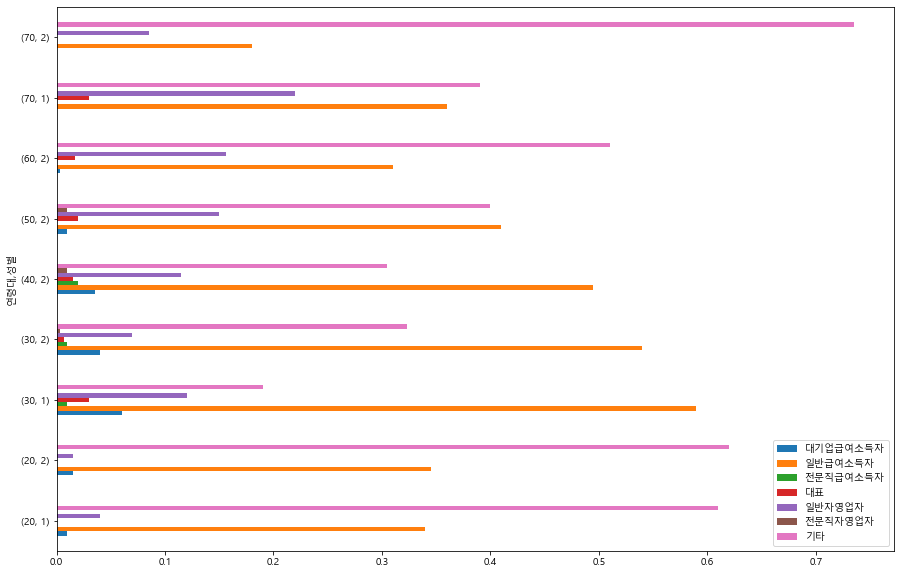

In [125]:
g.loc["경기도"].plot.barh(figsize=(15,10))

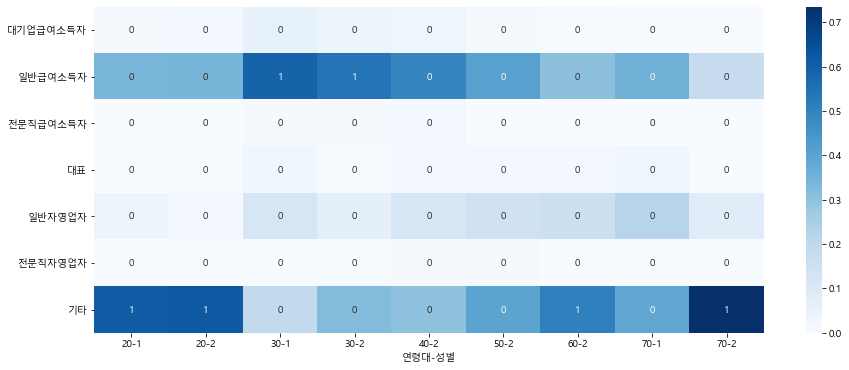

In [129]:
plt.figure(figsize=(15,6))
sns.heatmap(g.loc["경기도"].T, cmap = "Blues", annot=True, fmt=".0f")

### 시도별로 바라본 연령대별 대기업급여소득자

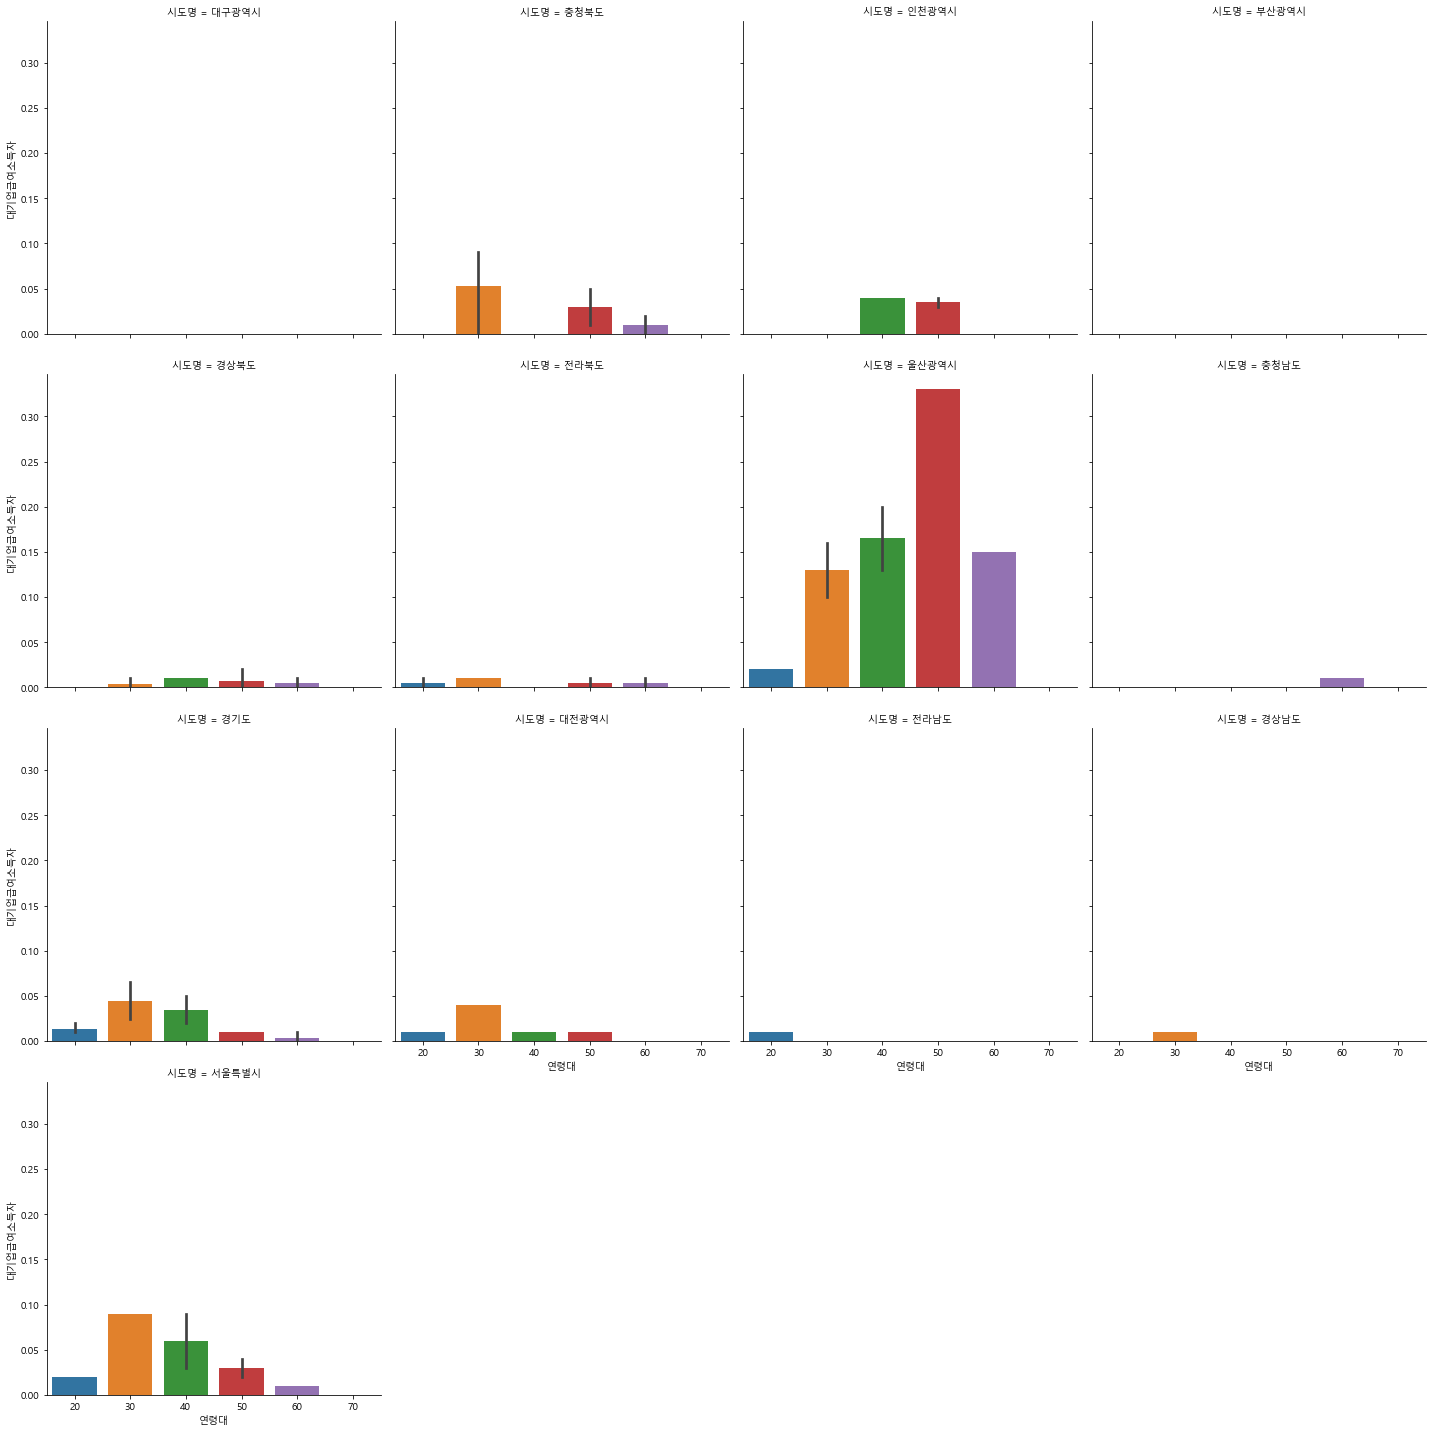

In [112]:
sns.catplot(data=df1 ,x="연령대", y="대기업급여소득자", kind="bar", col="시도명", col_wrap=4)

In [134]:
t = pd.pivot_table(df1, index="시도명", columns="연령대",values="성별")
t

연령대,20,30,40,50,60,70
시도명,,,,,,
경기도,1.666667,1.750000,2.000000,2.000000,2.0,1.666667
경상남도,2.000000,2.000000,2.000000,2.000000,2.0,2.000000
경상북도,1.000000,1.666667,1.666667,1.333333,1.5,2.000000
대구광역시,NaN,NaN,NaN,2.000000,2.0,NaN
대전광역시,1.000000,1.000000,1.000000,1.000000,NaN,NaN
부산광역시,NaN,NaN,NaN,2.000000,2.0,NaN
서울특별시,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
울산광역시,1.000000,1.000000,1.000000,1.000000,1.0,NaN
인천광역시,NaN,NaN,1.000000,1.000000,NaN,1.000000


### 연령대와 시도명에 따른 성별 분포

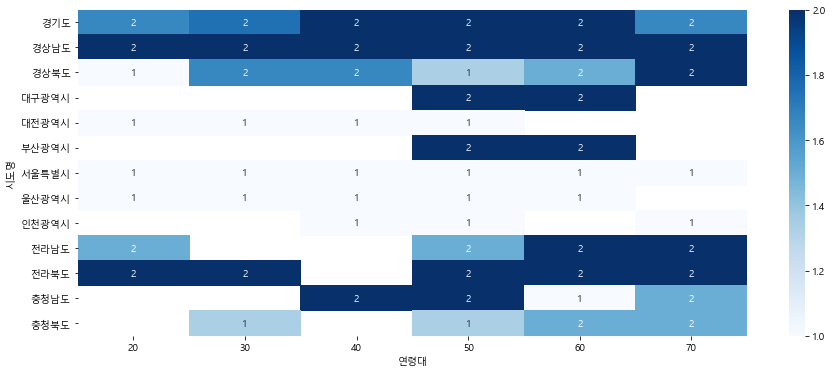

In [119]:
plt.figure(figsize=(15,6))
sns.heatmap(t, cmap = "Blues", annot=True, fmt=".0f")

In [120]:
h = pd.pivot_table(df1, index="시도명", columns="연령대",values="대기업급여소득자")
h

연령대,20,30,40,50,60,70
시도명,,,,,,
경기도,0.013333,0.045000,0.035,0.010000,0.003333,0.0
경상남도,0.000000,0.010000,0.000,0.000000,0.000000,0.0
경상북도,0.000000,0.003333,0.010,0.006667,0.005000,0.0
대구광역시,NaN,NaN,NaN,0.000000,0.000000,NaN
대전광역시,0.010000,0.040000,0.010,0.010000,NaN,NaN
부산광역시,NaN,NaN,NaN,0.000000,0.000000,NaN
서울특별시,0.020000,0.090000,0.060,0.030000,0.010000,0.0
울산광역시,0.020000,0.130000,0.165,0.330000,0.150000,NaN
인천광역시,NaN,NaN,0.040,0.035000,NaN,0.0


### 연령대와 시도명에 따른 대기업소득자의 분포

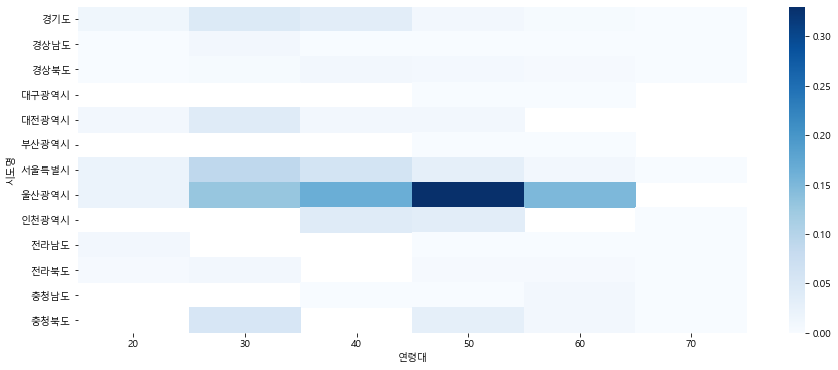

In [132]:
plt.figure(figsize=(15,6))
sns.heatmap(h, cmap = "Blues")

### 연령대와 시도별에 따른 전문직급여소득자 분포

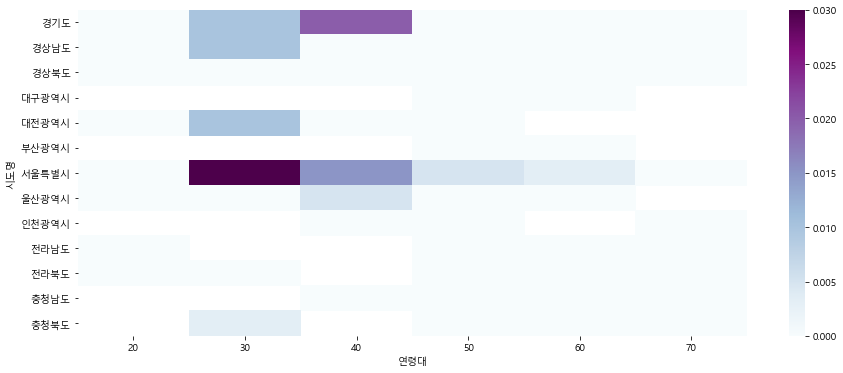

In [131]:
h2 = pd.pivot_table(df1, index="시도명", columns="연령대",values="전문직급여소득자")
plt.figure(figsize=(15,6))
sns.heatmap(h2, cmap = "BuPu")

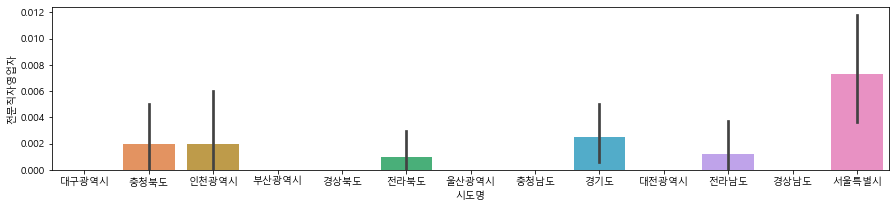

In [127]:
plt.figure(figsize=(15,3))
sns.barplot(data=df1, x="시도명", y="전문직자영업자")

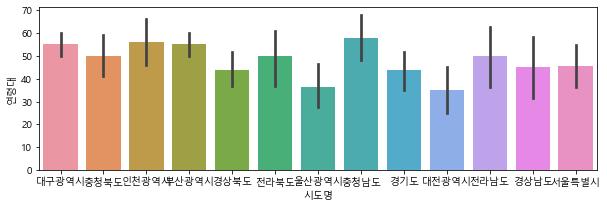

In [136]:
plt.figure(figsize=(10,3))
sns.barplot(data=df1, x="시도명", y="연령대")

<Figure size 1080x576 with 0 Axes>

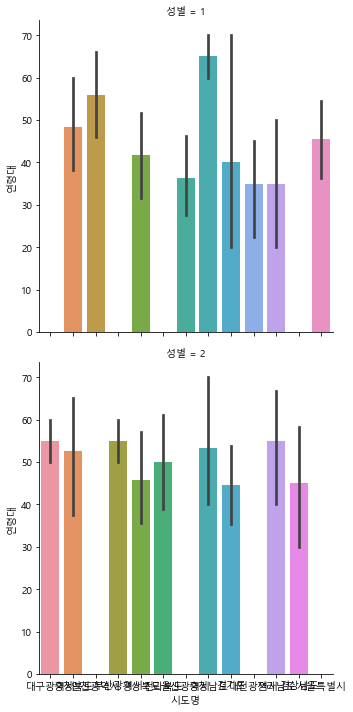

In [157]:
plt.figure(figsize=(15,8))
sns.catplot(data=df1, x="시도명", y="연령대", kind="bar", col="성별", col_wrap=1)

# 이제 (6)번 csv 파일로 넘어가자

In [166]:
df2.head()

,시도명,시군구명,행정동명,성별,연령대,평균신용점수,상위신용점수자 비율,중위신용점수자 비율,하위신용점수자 비율
0,충청북도,음성군,생극면,2,60,4,0.54,0.38,0.08
1,충청북도,음성군,생극면,2,30,4,0.22,0.70,0.07
2,충청북도,음성군,생극면,2,40,5,0.35,0.48,0.17
3,충청북도,음성군,생극면,2,20,4,0.24,0.73,0.03
4,충청북도,음성군,생극면,2,70,4,0.55,0.39,0.06


In [167]:
df2.describe()

,성별,연령대,평균신용점수,상위신용점수자 비율,중위신용점수자 비율,하위신용점수자 비율
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.580000,48.000000,3.570000,0.523400,0.395400,0.079900
std,0.496045,16.757329,0.590412,0.149283,0.144127,0.049655
min,1.000000,20.000000,2.000000,0.190000,0.130000,0.010000
25%,1.000000,37.500000,3.000000,0.407500,0.287500,0.040000
50%,2.000000,50.000000,4.000000,0.550000,0.370000,0.070000
75%,2.000000,60.000000,4.000000,0.632500,0.462500,0.110000
max,2.000000,70.000000,5.000000,0.840000,0.750000,0.240000


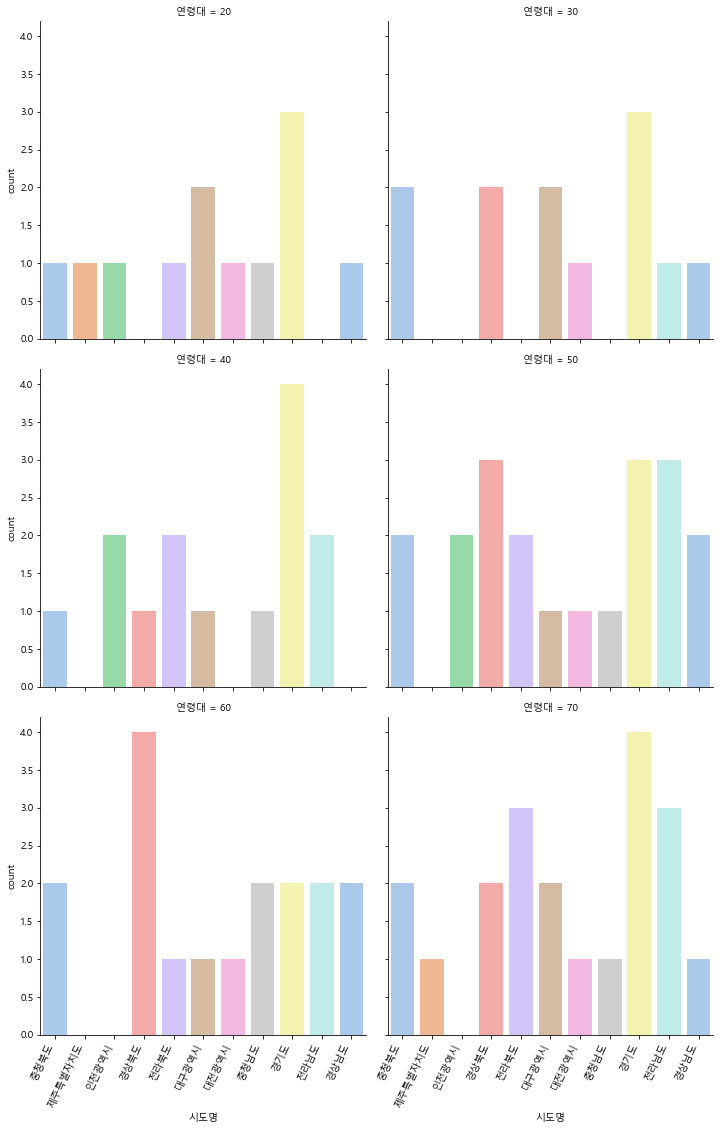

In [175]:
chart1 = sns.catplot(
    data=df2[df2['평균신용점수'].isin([3, 4])],
    x='시도명',
    kind='count',
    palette='pastel',
    col='연령대',
    aspect=1,
    col_wrap=2
)
chart1.set_xticklabels(rotation=65, horizontalalignment='right')

In [178]:
df2.head(2)

,시도명,시군구명,행정동명,성별,연령대,평균신용점수,상위신용점수자 비율,중위신용점수자 비율,하위신용점수자 비율
0,충청북도,음성군,생극면,2,60,4,0.54,0.38,0.08
1,충청북도,음성군,생극면,2,30,4,0.22,0.70,0.07


In [182]:
set1 = df2.groupby(["시도명","연령대"])["평균신용점수"].count()
set1.head(5)

시도명  연령대
경기도  20     3
     30     3
     40     4
     50     4
     60     2
Name: 평균신용점수, dtype: int64

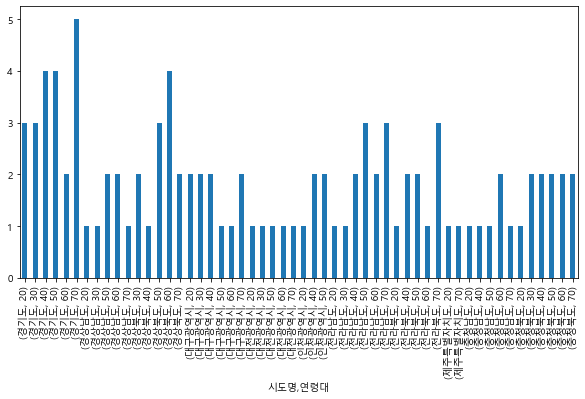

In [190]:
set1.plot(kind='bar',figsize=(10,5))

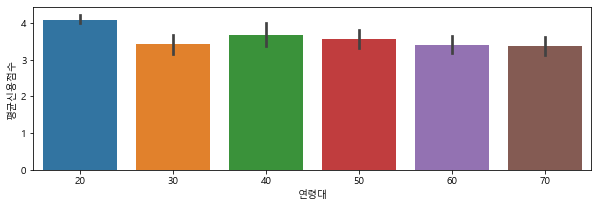

In [196]:
plt.figure(figsize=(10,3))
sns.barplot(data=df2, x="연령대", y="평균신용점수")

In [215]:
x = df2.groupby(["시도명","연령대","평균신용점수"]).mean().drop(["성별"],axis=1)

x.head(5)

상위신용점수자 비율  중위신용점수자 비율  하위신용점수자 비율
시도명 연령대 평균신용점수                                    
경기도 20  4         0.326667    0.633333    0.033333
    30  3         0.636667    0.296667    0.066667
    40  3         0.653333    0.253333    0.096667
        4         0.380000    0.410000    0.210000
    50  2         0.790000    0.140000    0.060000

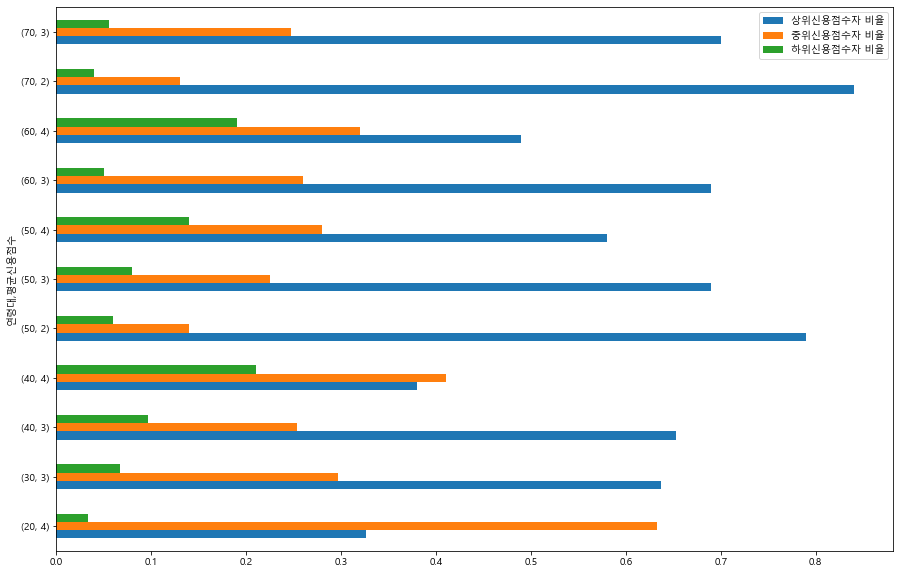

In [216]:
x.loc["경기도"].plot.barh(figsize=(15,10))

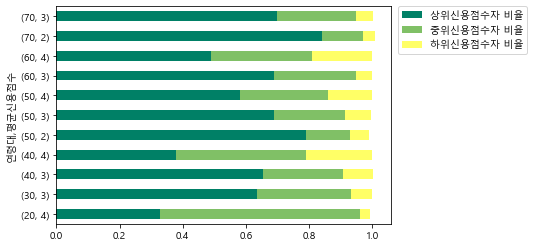

In [220]:
x.loc["경기도"].plot.barh(stacked=True, colormap="summer")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [230]:
x.head(2)

상위신용점수자 비율  중위신용점수자 비율  하위신용점수자 비율
시도명 연령대 평균신용점수                                    
경기도 20  4         0.326667    0.633333    0.033333
    30  3         0.636667    0.296667    0.066667

In [244]:
tt = df2.loc[0,["상위신용점수자 비율", "중위신용점수자 비율", "하위신용점수자 비율"]]
tt

상위신용점수자 비율    0.54
중위신용점수자 비율    0.38
하위신용점수자 비율    0.08
Name: 0, dtype: object

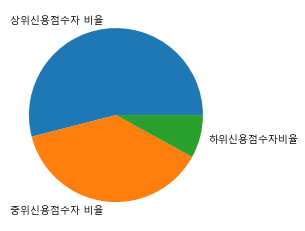

In [249]:
labels = ('상위신용점수자 비율', '중위신용점수자 비율', '하위신용점수자비율')
plt.pie(labels=labels, x = tt)
plt.show()

## 경기도 20대 신용점수 4 인 사람들의 분포

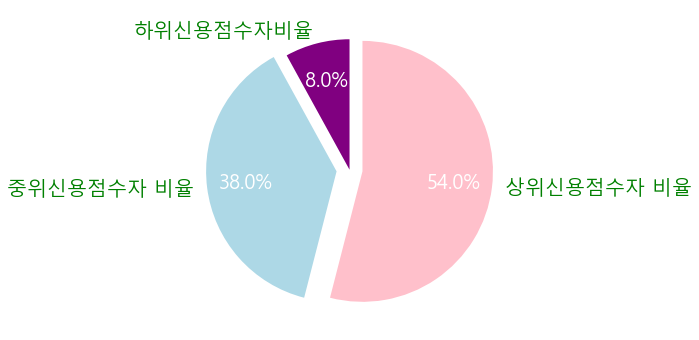

In [263]:
labels =  ('상위신용점수자 비율', '중위신용점수자 비율', '하위신용점수자비율') ## 라벨
xs = tt ## 값들, pie 차트에서 알아서 100% 기준으로 변경해서 정리해줌 
## 그림을 그립시다. 
plt.figure(figsize=(6, 6))
## plt.pie로 생기는 요소를 다음처럼 리턴하여 값을 저장해두고 
patches, texts, autotexts = plt.pie(
    labels=labels, ## label 
    labeldistance=1.1,## label이 파이로부터 얼마나 떨어지는가, 1일경우 딱 붙어있음. 
    x = tt, ## 값
    explode=(0.1, 0.1, 0), ##pie가 튀어나오는지 정해줌  
    startangle=90,## 어디에서 시작할지, 정해줌  
    shadow=False, ##그림자 
    counterclock=False, ## 시계방향으로 가는지, 시계 반대 방향으로 가는지 정해줌 
    autopct='%1.1f%%', ## pi 위에 표시될 글자 형태, 또한 알아서 %로 변환해서 알려줌 
    pctdistance=0.7, ## pct가 radius 기준으로 어디쯤에 위치할지 정함 
    colors=['pink', 'lightblue', 'purple'],
)
for t in texts:
    t.set_color("green")
    t.set_fontsize(20)
## pie 위의 텍스트를 다른 색으로 변경해주기 
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)